In [ ]:
#Import libraries
import os
from os import listdir
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Convert to frames
!ffmpeg -i "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/Video/WIN_20220831_11_17_58_Pro.mp4" -vf fps=30 "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf%05d.png"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

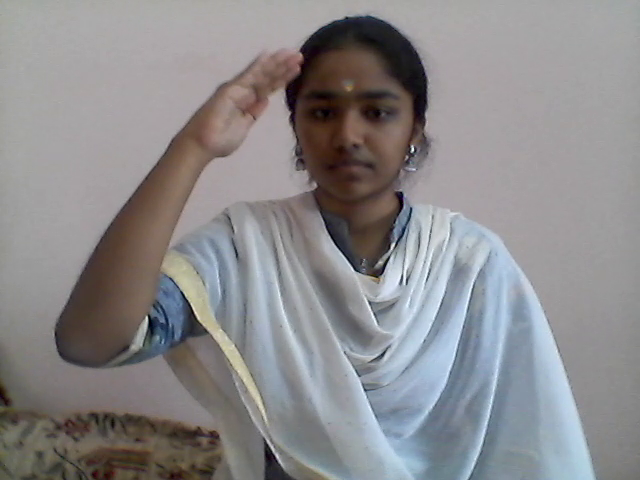

In [ ]:
#Read
img1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00178.png")
cv2_imshow(img1)

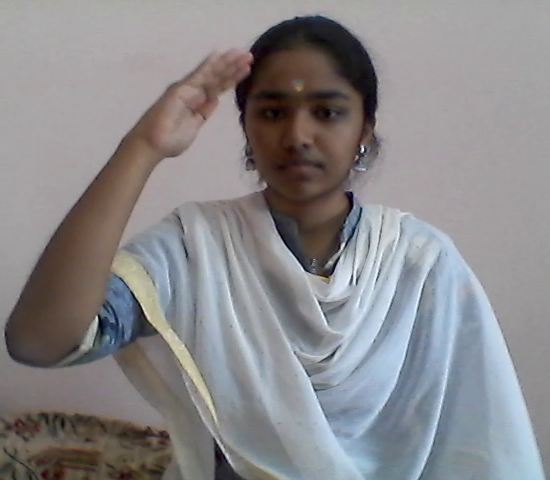

In [ ]:
#Cropping
crp_img1 = img1[:,50:600]
cv2_imshow(crp_img1)

(256, 256, 3)


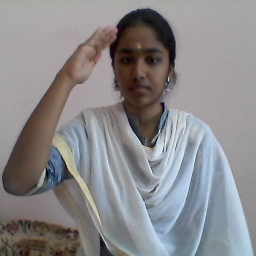

In [ ]:
#Resizing
resiz_img1 = cv2.resize(crp_img1,(256,256))
print(resiz_img1.shape)
cv2_imshow(resiz_img1)

(256, 256)


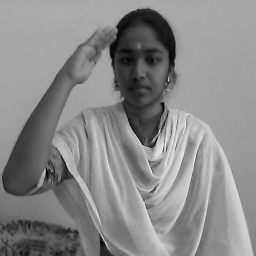

In [ ]:
#Convert to black-white
img1bw = cv2.cvtColor(resiz_img1, cv2.COLOR_BGR2GRAY)
print(img1bw.shape)
cv2_imshow(img1bw)

In [ ]:
#Crop,resize and convert to black and white in a loop
def preprocess_images(pic):
  img_cropped = pic[:,50:600]
  img_resized = cv2.resize(img_cropped,(256,256))
  img_bw = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY )
  return img_bw

In [ ]:
#Pre-processing
file_dir = "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages"
file_list = os.listdir(file_dir)
file_list.sort()
file_output = "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/Cropped"

#If the mentioned directory does not exist
if not os.path.exists(file_output):
  os.mkdir(file_output)

for count in file_list:
  pic = cv2.imread(os.path.join(file_dir,count))
  print(os.path.join(file_dir,count))
  p_image = preprocess_images(pic)
  cv2.imwrite(os.path.join(file_output,count),p_image)



/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00001.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00002.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00003.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00004.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00005.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00006.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00007.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00008.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/ReadImages/inf00009.png
/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Pr

In [ ]:
#ABSdiff
def ABSdiff(image1,image2):
  absdiff_images = cv2.absdiff(image1,image2)
  return absdiff_images

In [ ]:
#ABSdiff conversion
crp_dir = "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/Cropped"
crp_list = os.listdir(crp_dir)
crp_list.sort()
abs_output = "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/AbsImages"

#If the mentioned directory does not exist
if not os.path.exists(abs_output):
  os.mkdir(abs_output)

for i in range(0,len(crp_list)-1):
  print(i)
  print(i+1)
  curr_image = crp_list[i]
  nxt_image = crp_list[i+1]
  image1 = cv2.imread(os.path.join(crp_dir,curr_image))
  image2 = cv2.imread(os.path.join(crp_dir,nxt_image))
  absdiff = ABSdiff(image1, image2)
  cv2.imwrite(os.path.join(abs_output,curr_image),absdiff)

Streaming output truncated to the last 5000 lines.
378
379
379
380
380
381
381
382
382
383
383
384
384
385
385
386
386
387
387
388
388
389
389
390
390
391
391
392
392
393
393
394
394
395
395
396
396
397
397
398
398
399
399
400
400
401
401
402
402
403
403
404
404
405
405
406
406
407
407
408
408
409
409
410
410
411
411
412
412
413
413
414
414
415
415
416
416
417
417
418
418
419
419
420
420
421
421
422
422
423
423
424
424
425
425
426
426
427
427
428
428
429
429
430
430
431
431
432
432
433
433
434
434
435
435
436
436
437
437
438
438
439
439
440
440
441
441
442
442
443
443
444
444
445
445
446
446
447
447
448
448
449
449
450
450
451
451
452
452
453
453
454
454
455
455
456
456
457
457
458
458
459
459
460
460
461
461
462
462
463
463
464
464
465
465
466
466
467
467
468
468
469
469
470
470
471
471
472
472
473
473
474
474
475
475
476
476
477
477
478
478
479
479
480
480
481
481
482
482
483
483
484
484
485
485
486
486
487
487
488
488
489
489
490
490
491
491
492
492
493
493
494
494
495
495
496
496
4